# CCA

Here are some resources that may help with understanding this tool:
* Introduction to Canonical Correlation Analysis (CCA) in Python: https://cmdlinetips.com/2020/12/canonical-correlation-analysis-in-python/
* Compare cross decomposition methods: https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_compare_cross_decomposition.html#sphx-glr-auto-examples-cross-decomposition-plot-compare-cross-decomposition-py
* Multilabel classification: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multilabel.html#sphx-glr-auto-examples-miscellaneous-plot-multilabel-py
* Comprehensive Integration of Single-Cell Data: https://www.cell.com/cell/fulltext/S0092-8674(19)30559-8?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0092867419305598%3Fshowall%3Dtrue

### Intuition
I saw from Seurat's *Comprehensive Integration of Single-Cell Data* that CCA is a way that we can forcibly push data into a shared space. These authors used it to integrate single cell data together, finding cells that appear similar and overlapping them. An althernative approach would be to use the gentler RPCA (documented as SVD in the Mathemeatical Intutition report).

They generate PCA-like linear combinations of the other variables that "capture a hidden variable"

## Example 1: Introduction to Canonical Correlation Analysis (CCA) in Python


### Where to use
If we have two datasets from similar samples, it lets us look at the two simultaneously. In this example, there is an underlying pattern that unify penguins (their species). So if we have two expeditions to Antartica, one collected bill lengths and depths, and the other collected flipper lengths and body weight, we now have a tool to unify our observations!



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from sklearn.cross_decomposition import CCA

def corrfunc(x, y, hue=None, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

palette = list(sns.color_palette("tab10").as_hex())

### Reading in the data

In [2]:
# Reading in the data
link2data = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(link2data)
# Data pre-processing
df =df.dropna()
print(df.shape)
display(df.head())

(333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [3]:
df.groupby(["species",'island']).describe()

bill_length_mm                                            \
                             count       mean       std   min     25%    50%   
species   island                                                               
Adelie    Biscoe              44.0  38.975000  2.480916  34.5  37.675  38.70   
          Dream               55.0  38.520000  2.484276  32.1  36.700  38.80   
          Torgersen           47.0  39.038298  3.028097  33.5  36.650  39.00   
Chinstrap Dream               68.0  48.833824  3.339256  40.9  46.350  49.55   
Gentoo    Biscoe             119.0  47.568067  3.106116  40.9  45.350  47.40   

                                  bill_depth_mm             ...  \
                        75%   max         count       mean  ...   
species   island                                            ...   
Adelie    Biscoe     40.700  45.6          44.0  18.370455  ...   
          Dream      40.450  44.1          55.0  18.240000  ...   
          Torgersen  41.100  46.0          47.0  18.451064  ...   
Chinstrap Dream      51.075  58.0          68.0  18.420588  ...   
Gentoo    Biscoe     49.600  59.6         119.0  14.996639  ...   

                    flipper_length_mm        body_mass_g               \
                                  75%    max       count         mean   
species   island                                                        
Adelie    Biscoe                193.0  203.0        44.0  3709.659091   
          Dream                 193.0  208.0        55.0  3701.363636   
          Torgersen             195.5  210.0        47.0  3708.510638   
Chinstrap Dream                 201.0  212.0        68.0  3733.088235   
Gentoo    Biscoe                221.5  231.0       119.0  5092.436975   

                                                                         
                            std     min     25%     50%     75%     max  
species   island                                                         
Adelie    Biscoe     487.733722  2850.0  3387.5  3750.0  3975.0  4775.0  
          Dream      448.774519  2900.0  3400.0  3600.0  3987.5  4650.0  
          Torgersen  451.846351  2900.0  3337.5  3700.0  4000.0  4700.0  
Chinstrap Dream      384.335081  2700.0  3487.5  3700.0  3950.0  4800.0  
Gentoo    Biscoe     501.476154  3950.0  4700.0  5050.0  5500.0  6300.0  

[5 rows x 32 columns]

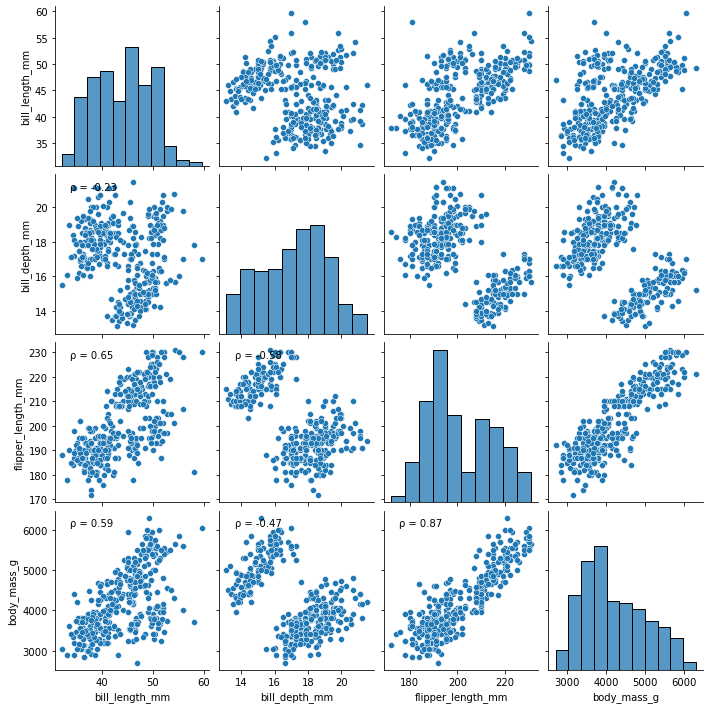

In [4]:
g = sns.pairplot(df)
g.map_lower(corrfunc)
plt.show()

### Split dataset into X and Y

In [5]:
# Creating X dataset
X = df[['bill_length_mm', 'bill_depth_mm']]
# Standardizing into Z-score
X_standardized = (X - X.mean()) / (X.std())
X_standardized.head()

,bill_length_mm,bill_depth_mm
0,-0.894695,0.779559
1,-0.821552,0.119404
2,-0.675264,0.424091
4,-1.333559,1.084246
5,-0.858123,1.744400


In [6]:
# Creating Y dataset 
Y = df[['flipper_length_mm', 'body_mass_g']]
# Standardizing into Z-score
Y_standardized = (Y-Y.mean()) / (Y.std())
Y_standardized.head()

,flipper_length_mm,body_mass_g
0,-1.424608,-0.567621
1,-1.067867,-0.505525
2,-0.425733,-1.188572
4,-0.568429,-0.940192
5,-0.782474,-0.691811


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


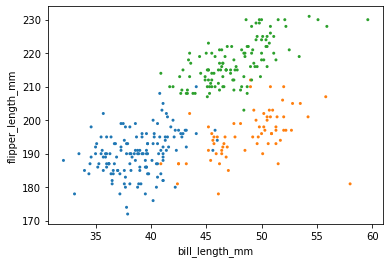

In [7]:
x = "bill_length_mm"
y = "flipper_length_mm"
plt.scatter(df[x], 
         df[y], 
         marker = '.', 
         linewidth = 0, 
         color = [palette[i] for i in df.species.astype('category').cat.codes])
plt.ylabel(y)
plt.xlabel(x)
print(df.columns)

### Performing CCA

In [8]:
ca = CCA()
ca.fit(X_standardized, Y_standardized)
X_c, Y_c = ca.transform(X_standardized, Y_standardized)

In [9]:
print(X_c.shape)

(333, 2)


In [10]:
X_c[1:10,]

array([[-0.70957262, -0.4560358 ],
       [-0.79073194, -0.13080943],
       [-1.7186634 , -0.07362316],
       [-1.77229457,  0.73624799],
       [-0.92349717, -0.37680578],
       [-1.46310909,  0.34393168],
       [-0.54860416, -0.18575929],
       [-2.06497815,  0.87937318],
       [-2.59671415,  0.3557524 ]])

In [11]:
Y_c[1:10,]

array([[-1.05385671,  0.42987851],
       [-0.3935502 , -0.83961988],
       [-0.5428878 , -0.45857086],
       [-0.76354771, -0.01420367],
       [-1.40461196,  0.52385824],
       [-0.44123754,  0.97307051],
       [-1.3190671 , -0.08008688],
       [-0.69724511,  0.11328768],
       [-0.21806776,  0.43329857]])

In [12]:
joint_c = np.concatenate((Y_c, X_c), axis=1)
joint_c[1:10,]

array([[-1.05385671,  0.42987851, -0.70957262, -0.4560358 ],
       [-0.3935502 , -0.83961988, -0.79073194, -0.13080943],
       [-0.5428878 , -0.45857086, -1.7186634 , -0.07362316],
       [-0.76354771, -0.01420367, -1.77229457,  0.73624799],
       [-1.40461196,  0.52385824, -0.92349717, -0.37680578],
       [-0.44123754,  0.97307051, -1.46310909,  0.34393168],
       [-1.3190671 , -0.08008688, -0.54860416, -0.18575929],
       [-0.69724511,  0.11328768, -2.06497815,  0.87937318],
       [-0.21806776,  0.43329857, -2.59671415,  0.3557524 ]])

In [23]:
np.corrcoef(X_c[:,0:2], Y_c[:,0:2])

array([[ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.]])

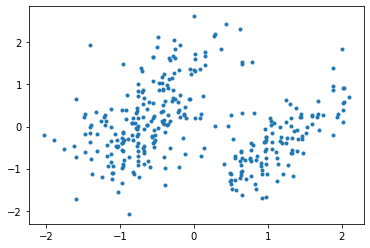

In [13]:
plt.plot(joint_c[:,0], joint_c[:,3], linewidth = 0, marker = '.')

In [15]:
ca.x_loadings_

array([[ 0.74865652,  0.63662841],
       [-0.66390065,  0.77117071]])

In [16]:
ca.y_loadings_

array([[1.02428558, 0.02694639],
       [0.88745256, 0.99963688]])

In [17]:
ca.get_params()

{'copy': True, 'max_iter': 500, 'n_components': 2, 'scale': True, 'tol': 1e-06}